In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score

#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

import pickle

# Load prepared data

In [2]:
dir_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/"
# dir_path = "/Users/mriworkshop/Documents/TDCS/code/tdcs_thesis/"
save_path = dir_path+"data/raw/"
img_path =  dir_path+"data/processed/"
model_path = dir_path+"models/"

## fmap mean

In [3]:
# 3 attributes
file_mean = save_path+"fmap_mean_roi_32to38.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'amp', 'neg','mean0', 'mean1', 'mean2', 'theory']
data = np.loadtxt(file_mean);

In [4]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int, "neg": int, "amp":int})
df

,exp,mini_exp,i,j,k,amp,neg,mean0,mean1,mean2,theory
0,32,1,0,0,0,2,0,-467.847626,-474.438446,-490.049805,2.608974
1,32,1,0,0,1,2,0,-624.234802,-630.178467,-644.649231,2.824424
2,32,1,0,0,2,2,0,-716.909119,-724.083923,-738.119629,3.062833
3,32,1,0,0,3,2,0,-737.430176,-744.375488,-758.378723,3.327526
4,32,1,0,0,4,2,0,-717.468018,-725.066650,-738.667725,3.622561
...,...,...,...,...,...,...,...,...,...,...,...
635355,38,6,18,18,39,2,1,-954.100403,-959.997986,-959.053711,-3.513359
635356,38,6,18,18,40,2,1,-963.235291,-969.107910,-968.167297,-3.225791
635357,38,6,18,18,41,2,1,-1004.292725,-1009.776916,-1009.972046,-2.967721
635358,38,6,18,18,42,2,1,-1063.031128,-1067.428955,-1068.936646,-2.735306


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635360 entries, 0 to 635359
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   exp       635360 non-null  int64  
 1   mini_exp  635360 non-null  int64  
 2   i         635360 non-null  int64  
 3   j         635360 non-null  int64  
 4   k         635360 non-null  int64  
 5   amp       635360 non-null  int64  
 6   neg       635360 non-null  int64  
 7   mean0     635360 non-null  float64
 8   mean1     635360 non-null  float64
 9   mean2     635360 non-null  float64
 10  theory    635360 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 53.3 MB


# Split data

## Data 1. fmap mean all experiments

In [6]:
df1_train = df[~((df['exp']==36) & ((df['mini_exp']==5) | (df['mini_exp']==6)))]
df1_val =  df[(df['exp']==36) & (df['mini_exp']==5)]
df1_test1 =  df[(df['exp']==36) & (df['mini_exp']==6) & (df['neg']==1)]
df1_test2 =  df[(df['exp']==36) & (df['mini_exp']==6) & (df['neg']==0)]

In [7]:
df1_test2

,exp,mini_exp,i,j,k,amp,neg,mean0,mean1,mean2,theory
254144,36,6,0,0,0,2,0,-1578.817261,-1584.814087,-1597.626343,2.791874
254145,36,6,0,0,1,2,0,-1680.403687,-1685.735840,-1698.662964,3.026984
254146,36,6,0,0,2,2,0,-1689.335693,-1693.475830,-1706.518555,3.287904
254147,36,6,0,0,3,2,0,-1637.218140,-1640.632202,-1654.127563,3.578579
254148,36,6,0,0,4,2,0,-1548.242188,-1550.803955,-1564.804688,3.903890
...,...,...,...,...,...,...,...,...,...,...,...
270023,36,6,18,18,39,2,0,-853.540649,-856.423950,-870.780396,3.026631
270024,36,6,18,18,40,2,0,-830.878723,-833.325684,-847.634460,2.793828
270025,36,6,18,18,41,2,0,-816.365723,-819.364624,-833.990967,2.583129
270026,36,6,18,18,42,2,0,-867.515625,-870.009399,-884.009888,2.391902


In [8]:
print(df1_train.shape)
print(df1_val.shape)
print(df1_test1.shape)
print(df1_test2.shape)

(571824, 11)
(31768, 11)
(15884, 11)
(15884, 11)


In [9]:
df1_train.iloc[:, 7:-1]

,mean0,mean1,mean2
0,-467.847626,-474.438446,-490.049805
1,-624.234802,-630.178467,-644.649231
2,-716.909119,-724.083923,-738.119629
3,-737.430176,-744.375488,-758.378723
4,-717.468018,-725.066650,-738.667725
...,...,...,...
635355,-954.100403,-959.997986,-959.053711
635356,-963.235291,-969.107910,-968.167297
635357,-1004.292725,-1009.776916,-1009.972046
635358,-1063.031128,-1067.428955,-1068.936646


In [10]:
X1_train = df1_train.iloc[:, 7:-1].values 
y1_train = df1_train['theory'].values

X1_test = df1_val.iloc[:, 7:-1].values 
y1_test = df1_val['theory'].values

X1_pred1 = df1_test1.iloc[:, 7:-1].values 
y1_pred1 = df1_test1['theory'].values

X1_pred2 = df1_test2.iloc[:, 7:-1].values 
y1_pred2 = df1_test2['theory'].values

In [11]:
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)
print(X1_pred1.shape)
print(y1_pred1.shape)
print(X1_pred2.shape)
print(y1_pred2.shape)

(571824, 3)
(571824,)
(31768, 3)
(31768,)
(15884, 3)
(15884,)
(15884, 3)
(15884,)


# Model

In [12]:
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test = y1_test

In [13]:
shape = (len(X_train[0]),)
model = keras.Sequential()
model.add(Dense(5, activation='relu', input_shape=shape)) 
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='RMSprop', loss='mse', metrics=["mae"])

2023-04-17 18:12:58.484816: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
checkpointer = ModelCheckpoint(model_path+'best_model_nn_roi.h5', verbose=1, save_best_only=True)

In [15]:
history = model.fit(X_train, y_train, epochs=300, batch_size=64, validation_data=[X_test, y_test],  callbacks=[checkpointer])

Epoch 1/300
8883/8935 [============================>.] - ETA: 0s - loss: 951.7718 - mae: 7.9219
Epoch 1: val_loss improved from inf to 49.27132, saving model to /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/models/best_model_nn_roi.h5
8935/8935 [==============================] - 10s 975us/step - loss: 946.4859 - mae: 7.8998 - val_loss: 49.2713 - val_mae: 3.8553
Epoch 2/300
8889/8935 [============================>.] - ETA: 0s - loss: 34.1257 - mae: 3.1655
Epoch 2: val_loss improved from 49.27132 to 19.89618, saving model to /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/models/best_model_nn_roi.h5
8935/8935 [==============================] - 8s 923us/step - loss: 34.0814 - mae: 3.1609 - val_loss: 19.8962 - val_mae: 2.3856
Epoch 3/300
8927/8935 [============================>.] - ETA: 0s - loss: 19.2941 - mae: 2.1560
Epoch 3: val_loss did not improve from 19.89618
8935/8935 [==============================] - 8s 918us/step - loss: 19.2875 - mae: 2.1561 - val_loss: 20.9768 

Epoch 28/300
8900/8935 [============================>.] - ETA: 0s - loss: 12.4921 - mae: 1.8569
Epoch 28: val_loss improved from 9.97276 to 9.56277, saving model to /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/models/best_model_nn_roi.h5
8935/8935 [==============================] - 8s 917us/step - loss: 12.4704 - mae: 1.8567 - val_loss: 9.5628 - val_mae: 2.0063
Epoch 29/300
8932/8935 [============================>.] - ETA: 0s - loss: 12.5103 - mae: 1.8566
Epoch 29: val_loss did not improve from 9.56277
8935/8935 [==============================] - 8s 916us/step - loss: 12.5087 - mae: 1.8566 - val_loss: 9.7684 - val_mae: 1.9555
Epoch 30/300
8908/8935 [============================>.] - ETA: 0s - loss: 12.5378 - mae: 1.8572
Epoch 30: val_loss did not improve from 9.56277
8935/8935 [==============================] - 8s 913us/step - loss: 12.5254 - mae: 1.8570 - val_loss: 12.7749 - val_mae: 2.3682
Epoch 31/300
8899/8935 [============================>.] - ETA: 0s - loss: 12.5521 - m

8935/8935 [==============================] - 8s 936us/step - loss: 11.8821 - mae: 1.8113 - val_loss: 11.9049 - val_mae: 2.3627
Epoch 58/300
8933/8935 [============================>.] - ETA: 0s - loss: 11.8693 - mae: 1.8047
Epoch 58: val_loss did not improve from 8.89278
8935/8935 [==============================] - 9s 961us/step - loss: 11.8684 - mae: 1.8047 - val_loss: 13.2323 - val_mae: 2.5047
Epoch 59/300
8896/8935 [============================>.] - ETA: 0s - loss: 11.8652 - mae: 1.8049
Epoch 59: val_loss did not improve from 8.89278
8935/8935 [==============================] - 9s 1ms/step - loss: 11.8570 - mae: 1.8052 - val_loss: 16.1542 - val_mae: 2.7441
Epoch 60/300
8933/8935 [============================>.] - ETA: 0s - loss: 11.8596 - mae: 1.8038
Epoch 60: val_loss did not improve from 8.89278
8935/8935 [==============================] - 9s 1ms/step - loss: 11.8581 - mae: 1.8037 - val_loss: 17.5962 - val_mae: 3.0568
Epoch 61/300
8934/8935 [============================>.] - ETA: 0

8935/8935 [==============================] - 8s 930us/step - loss: 11.7777 - mae: 1.7713 - val_loss: 8.8028 - val_mae: 1.9225
Epoch 87/300
8907/8935 [============================>.] - ETA: 0s - loss: 11.7233 - mae: 1.7708
Epoch 87: val_loss did not improve from 7.94424
8935/8935 [==============================] - 8s 927us/step - loss: 11.7088 - mae: 1.7708 - val_loss: 10.6893 - val_mae: 2.2232
Epoch 88/300
8910/8935 [============================>.] - ETA: 0s - loss: 11.8244 - mae: 1.7715
Epoch 88: val_loss did not improve from 7.94424
8935/8935 [==============================] - 9s 991us/step - loss: 11.8114 - mae: 1.7714 - val_loss: 10.0818 - val_mae: 2.0668
Epoch 89/300
8926/8935 [============================>.] - ETA: 0s - loss: 11.6649 - mae: 1.7670
Epoch 89: val_loss did not improve from 7.94424
8935/8935 [==============================] - 8s 930us/step - loss: 11.6584 - mae: 1.7668 - val_loss: 9.7317 - val_mae: 2.0416
Epoch 90/300
8929/8935 [============================>.] - ETA:

Epoch 115/300
8925/8935 [============================>.] - ETA: 0s - loss: 10.8996 - mae: 1.7150
Epoch 115: val_loss did not improve from 6.44100
8935/8935 [==============================] - 8s 930us/step - loss: 10.8931 - mae: 1.7148 - val_loss: 6.6157 - val_mae: 1.5572
Epoch 116/300
8904/8935 [============================>.] - ETA: 0s - loss: 11.0033 - mae: 1.7130
Epoch 116: val_loss did not improve from 6.44100
8935/8935 [==============================] - 8s 940us/step - loss: 10.9918 - mae: 1.7132 - val_loss: 7.2272 - val_mae: 1.7003
Epoch 117/300
8907/8935 [============================>.] - ETA: 0s - loss: 10.8403 - mae: 1.7114
Epoch 117: val_loss improved from 6.44100 to 6.40709, saving model to /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/models/best_model_nn_roi.h5
8935/8935 [==============================] - 8s 939us/step - loss: 10.8310 - mae: 1.7116 - val_loss: 6.4071 - val_mae: 1.5382
Epoch 118/300
8923/8935 [============================>.] - ETA: 0s - loss: 10.72

Epoch 144/300
8934/8935 [============================>.] - ETA: 0s - loss: 10.3107 - mae: 1.7021
Epoch 144: val_loss did not improve from 6.12735
8935/8935 [==============================] - 9s 1ms/step - loss: 10.3110 - mae: 1.7021 - val_loss: 9.9067 - val_mae: 2.2024
Epoch 145/300
8927/8935 [============================>.] - ETA: 0s - loss: 10.3488 - mae: 1.7070
Epoch 145: val_loss did not improve from 6.12735
8935/8935 [==============================] - 9s 1ms/step - loss: 10.3466 - mae: 1.7070 - val_loss: 6.7114 - val_mae: 1.6581
Epoch 146/300
8934/8935 [============================>.] - ETA: 0s - loss: 10.2034 - mae: 1.7072
Epoch 146: val_loss did not improve from 6.12735
8935/8935 [==============================] - 9s 1ms/step - loss: 10.2030 - mae: 1.7073 - val_loss: 8.3194 - val_mae: 1.9520
Epoch 147/300
8927/8935 [============================>.] - ETA: 0s - loss: 10.2192 - mae: 1.7076
Epoch 147: val_loss improved from 6.12735 to 6.10516, saving model to /Users/chikakoolsen/opt

Epoch 173/300
8900/8935 [============================>.] - ETA: 0s - loss: 9.8759 - mae: 1.7094
Epoch 173: val_loss did not improve from 5.31010
8935/8935 [==============================] - 9s 1ms/step - loss: 9.8638 - mae: 1.7095 - val_loss: 5.6589 - val_mae: 1.5664
Epoch 174/300
8922/8935 [============================>.] - ETA: 0s - loss: 9.7245 - mae: 1.7110
Epoch 174: val_loss did not improve from 5.31010
8935/8935 [==============================] - 9s 1ms/step - loss: 9.7217 - mae: 1.7111 - val_loss: 7.1208 - val_mae: 1.8340
Epoch 175/300
8898/8935 [============================>.] - ETA: 0s - loss: 9.7544 - mae: 1.7100
Epoch 175: val_loss did not improve from 5.31010
8935/8935 [==============================] - 9s 1ms/step - loss: 9.7391 - mae: 1.7099 - val_loss: 6.2653 - val_mae: 1.7355
Epoch 176/300
8926/8935 [============================>.] - ETA: 0s - loss: 9.6967 - mae: 1.7092
Epoch 176: val_loss did not improve from 5.31010
8935/8935 [==============================] - 9s 1ms

8920/8935 [============================>.] - ETA: 0s - loss: 9.3780 - mae: 1.7148
Epoch 203: val_loss did not improve from 5.03425
8935/8935 [==============================] - 9s 1ms/step - loss: 9.3711 - mae: 1.7146 - val_loss: 13.4412 - val_mae: 2.8102
Epoch 204/300
8927/8935 [============================>.] - ETA: 0s - loss: 9.3597 - mae: 1.7124
Epoch 204: val_loss did not improve from 5.03425
8935/8935 [==============================] - 9s 1ms/step - loss: 9.3570 - mae: 1.7123 - val_loss: 6.6858 - val_mae: 1.8453
Epoch 205/300
8928/8935 [============================>.] - ETA: 0s - loss: 9.3824 - mae: 1.7135
Epoch 205: val_loss did not improve from 5.03425
8935/8935 [==============================] - 10s 1ms/step - loss: 9.3829 - mae: 1.7136 - val_loss: 8.6261 - val_mae: 2.1106
Epoch 206/300
8915/8935 [============================>.] - ETA: 0s - loss: 9.4237 - mae: 1.7096
Epoch 206: val_loss did not improve from 5.03425
8935/8935 [==============================] - 9s 1ms/step - loss

Epoch 233/300
8916/8935 [============================>.] - ETA: 0s - loss: 8.6841 - mae: 1.6805
Epoch 233: val_loss did not improve from 4.70852
8935/8935 [==============================] - 8s 873us/step - loss: 8.6810 - mae: 1.6805 - val_loss: 4.7581 - val_mae: 1.5971
Epoch 234/300
8892/8935 [============================>.] - ETA: 0s - loss: 8.6655 - mae: 1.6748
Epoch 234: val_loss did not improve from 4.70852
8935/8935 [==============================] - 8s 875us/step - loss: 8.6617 - mae: 1.6751 - val_loss: 11.6529 - val_mae: 2.7052
Epoch 235/300
8884/8935 [============================>.] - ETA: 0s - loss: 8.7030 - mae: 1.6750
Epoch 235: val_loss improved from 4.70852 to 4.39043, saving model to /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/models/best_model_nn_roi.h5
8935/8935 [==============================] - 8s 895us/step - loss: 8.6900 - mae: 1.6748 - val_loss: 4.3904 - val_mae: 1.5143
Epoch 236/300
8919/8935 [============================>.] - ETA: 0s - loss: 8.6143 - m

Epoch 262/300
8883/8935 [============================>.] - ETA: 0s - loss: 8.4368 - mae: 1.6293
Epoch 262: val_loss did not improve from 4.08346
8935/8935 [==============================] - 8s 883us/step - loss: 8.4404 - mae: 1.6298 - val_loss: 7.1557 - val_mae: 1.9143
Epoch 263/300
8907/8935 [============================>.] - ETA: 0s - loss: 8.4598 - mae: 1.6294
Epoch 263: val_loss did not improve from 4.08346
8935/8935 [==============================] - 8s 880us/step - loss: 8.4511 - mae: 1.6293 - val_loss: 4.9683 - val_mae: 1.6404
Epoch 264/300
8935/8935 [==============================] - ETA: 0s - loss: 8.4212 - mae: 1.6280
Epoch 264: val_loss did not improve from 4.08346
8935/8935 [==============================] - 8s 877us/step - loss: 8.4212 - mae: 1.6280 - val_loss: 5.3351 - val_mae: 1.7276
Epoch 265/300
8929/8935 [============================>.] - ETA: 0s - loss: 8.3866 - mae: 1.6270
Epoch 265: val_loss did not improve from 4.08346
8935/8935 [==============================] - 

Epoch 292/300
8888/8935 [============================>.] - ETA: 0s - loss: 8.4498 - mae: 1.6045
Epoch 292: val_loss did not improve from 4.07149
8935/8935 [==============================] - 8s 876us/step - loss: 8.4404 - mae: 1.6045 - val_loss: 4.3828 - val_mae: 1.5427
Epoch 293/300
8915/8935 [============================>.] - ETA: 0s - loss: 8.3772 - mae: 1.6037
Epoch 293: val_loss improved from 4.07149 to 4.06206, saving model to /Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/models/best_model_nn_roi.h5
8935/8935 [==============================] - 8s 886us/step - loss: 8.3741 - mae: 1.6037 - val_loss: 4.0621 - val_mae: 1.4671
Epoch 294/300
8922/8935 [============================>.] - ETA: 0s - loss: 8.4508 - mae: 1.6019
Epoch 294: val_loss did not improve from 4.06206
8935/8935 [==============================] - 8s 879us/step - loss: 8.4463 - mae: 1.6019 - val_loss: 6.2433 - val_mae: 1.8386
Epoch 295/300
8908/8935 [============================>.] - ETA: 0s - loss: 7.7662 - ma

In [16]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mae(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mae(test_pred, y_test))
print(mape(test_pred, y_test))

17870/17870 [==============================] - 11s 626us/step
10.775092937359197
2.0236637333594127
1.6386443957363213
993/993 [==============================] - 1s 629us/step
7.883576134992438
2.0858698714684953
1.4512165695418304


In [17]:
model.evaluate(X_test, y_test)

993/993 [==============================] - 1s 729us/step - loss: 7.8836 - mae: 2.0859


[7.883572578430176, 2.085869550704956]

In [18]:
np.corrcoef(test_pred.flatten(), y_test)

array([[1.        , 0.98448466],
       [0.98448466, 1.        ]])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 20        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________


## Plot

### Loss function (MSE)

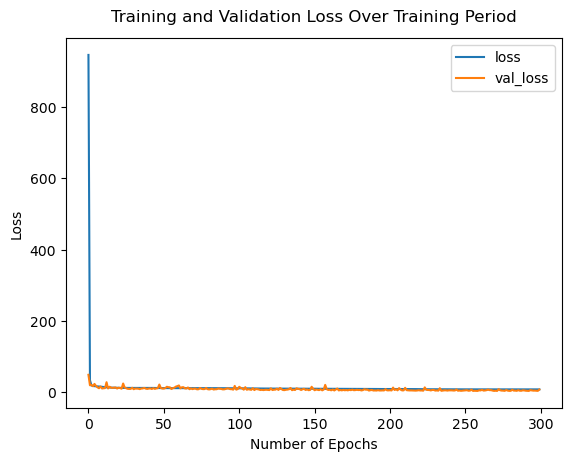

In [20]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Theory vs Predict

### Positive

In [21]:
test_pred1 = model.predict(X1_pred1)

497/497 [==============================] - 0s 669us/step


In [22]:
y_pred = y1_pred1

r: 0.96898, st_er: 0.001719
y = 0.8493*x + -2.2621


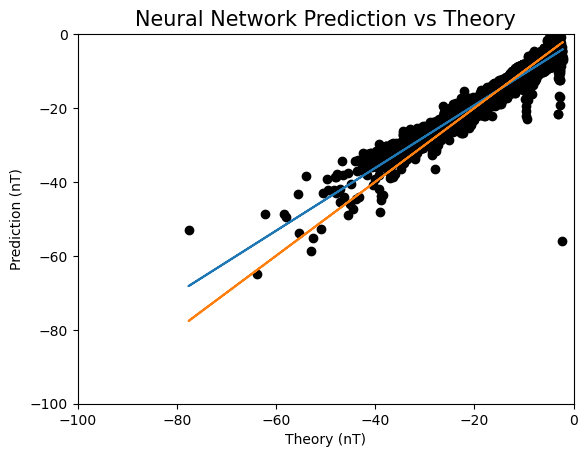

In [25]:
x = y_pred.flatten()
y = test_pred1.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_pred, test_pred1,  color='black')
plt.axis([-100,0, -100, 0])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
plt.title("Neural Network Prediction vs Theory", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

### Negative

In [26]:
test_pred2 = model.predict(X1_pred2)

497/497 [==============================] - 0s 701us/step


In [27]:
y_pred = y1_pred2

r: 0.93652, st_er: 0.003034
y = 1.0213*x + -1.8415


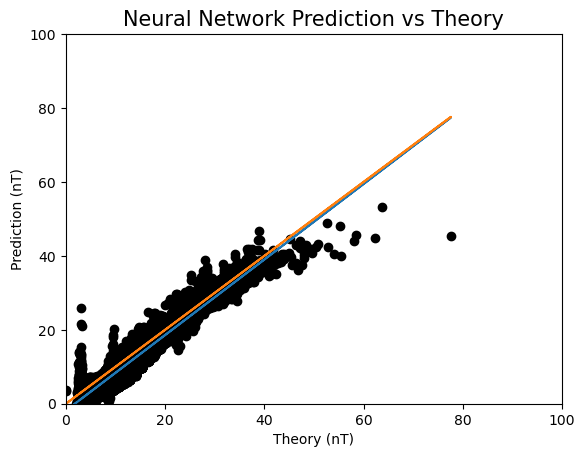

In [28]:
x = y_pred.flatten()
y = test_pred2.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_pred, test_pred2,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
plt.title("Neural Network Prediction vs Theory", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output data

In [30]:
df1_test1['predict'] = test_pred1
df1_test2['predict'] = test_pred2

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_2032/1985395262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_test1['predict'] = test_pred1
/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_2032/1985395262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_test2['predict'] = test_pred2


In [31]:
df1_test1

,exp,mini_exp,i,j,k,amp,neg,mean0,mean1,mean2,theory,predict
270028,36,6,0,0,0,2,1,-1597.626343,-1607.794434,-1610.972046,-2.791874,-4.929583
270029,36,6,0,0,1,2,1,-1698.662964,-1709.008911,-1711.598145,-3.026984,-4.680910
270030,36,6,0,0,2,2,1,-1706.518555,-1717.524902,-1719.162476,-3.287904,-4.912109
270031,36,6,0,0,3,2,1,-1654.127563,-1665.365601,-1666.619263,-3.578579,-5.173189
270032,36,6,0,0,4,2,1,-1564.804688,-1576.146484,-1577.421509,-3.903890,-5.497906
...,...,...,...,...,...,...,...,...,...,...,...,...
285907,36,6,18,18,39,2,1,-870.780396,-882.470093,-882.949402,-3.026631,-6.818369
285908,36,6,18,18,40,2,1,-847.634460,-859.318237,-859.638062,-2.793828,-6.824450
285909,36,6,18,18,41,2,1,-833.990967,-845.007202,-845.524414,-2.583129,-6.610912
285910,36,6,18,18,42,2,1,-884.009888,-895.539429,-896.950806,-2.391902,-6.634425


In [32]:
df1_test2

,exp,mini_exp,i,j,k,amp,neg,mean0,mean1,mean2,theory,predict
254144,36,6,0,0,0,2,0,-1578.817261,-1584.814087,-1597.626343,2.791874,-1.308041
254145,36,6,0,0,1,2,0,-1680.403687,-1685.735840,-1698.662964,3.026984,0.424106
254146,36,6,0,0,2,2,0,-1689.335693,-1693.475830,-1706.518555,3.287904,1.830869
254147,36,6,0,0,3,2,0,-1637.218140,-1640.632202,-1654.127563,3.578579,2.221638
254148,36,6,0,0,4,2,0,-1548.242188,-1550.803955,-1564.804688,3.903890,2.404624
...,...,...,...,...,...,...,...,...,...,...,...,...
270023,36,6,18,18,39,2,0,-853.540649,-856.423950,-870.780396,3.026631,2.059747
270024,36,6,18,18,40,2,0,-830.878723,-833.325684,-847.634460,2.793828,2.287142
270025,36,6,18,18,41,2,0,-816.365723,-819.364624,-833.990967,2.583129,2.320687
270026,36,6,18,18,42,2,0,-867.515625,-870.009399,-884.009888,2.391902,2.057191


In [33]:
np.savetxt(img_path+"nn_roi_32to38_neg.txt", df1_test1[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")
np.savetxt(img_path+"nn_roi_32to38_pos.txt", df1_test2[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")